# Neural Network For Handwritten Digits Classification | Deep Learning

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Loading `mnist` dataset

In [2]:
(X_train, y_train), (X_test, y_test)=keras.datasets.mnist.load_data()

## Overview of MNIST dataset

`(X_train, y_train), (X_test, y_test)`: This line of code is using tuple unpacking to assign four variables:

- `X_train`: This variable will contain th**e training imag**es from the MNIST dataset.
- `y_train`: This variable will contain t**he corresponding lab**els for the training images.
- `X_test`: This variable will contain **the testing im**ages from the MNIST dataset.
- `y_test`: This variable will contain** the corresponding l**abels for the testing images.

`keras.datasets.mnist.load_data()`: This is a function call to load the MNIST dataset using the Keras library. The MNIST dataset is a popular dataset in the field of machine learning and computer vision. It consists of a collection of 28x28 pixel grayscale images of handwritten digits (0 through 9) along with their corresponding labels.

- `X_train` and `X_test` will contain arrays of image data, where each element is a 28x28 numpy array representing a handwritten digit image.
- `y_train` and `y_test` will contain the corresponding labels, which are integers representing the actual digit depicted in ech image.


In [3]:
type(keras.datasets.mnist.load_data())

tuple

- `tuple = ((X_train, y_train), (X_test, y_test))`

In [4]:
len(keras.datasets.mnist.load_data())

2

- `tuple1 = (X_train, y_train)` and `tuple2 = (X_test, y_test)`

In [5]:
print(len(keras.datasets.mnist.load_data()[0]))
print(len(keras.datasets.mnist.load_data()[1]))

2
2


- So, `X_train = keras.datasets.mnist.load_data()[0][0]` , `y_train = keras.datasets.mnist.load_data()[0][1]`.
- And, `X_test = keras.datasets.mnist.load_data()[1][0]` , `y_test = keras.datasets.mnist.load_data()[1][1]` .

### `(X_train, y_train)`

- type of the variables

In [6]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

- length of the arrays.
- we have 60000 digit images and their corresponding labels.

In [7]:
len(X_train), len(y_train)

(60000, 60000)

- shape of both array

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

- type of each element

In [10]:
type(X_train[0]), type(y_train[0])

(numpy.ndarray, numpy.uint8)

- shape of each element

In [11]:
X_train[0].shape

(28, 28)

In [12]:
y_train[0].shape

()

- printing each element

In [13]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [14]:
y_train[0]

5

### `(X_test, y_test)`

- Type of both variables

In [15]:
type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray)

- Length of the arrays

In [16]:
len(X_test), len(y_test)

(10000, 10000)

- shape of both array

In [17]:
X_test.shape

(10000, 28, 28)

In [18]:
y_test.shape

(10000,)

- shape of each element

In [19]:
X_test[0].shape

(28, 28)

In [20]:
y_test[0].shape

()

- printing each element

In [21]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [22]:
y_test[0]

7

## Plotting `X_train` matrices and checking correspoinding `y_train`

5


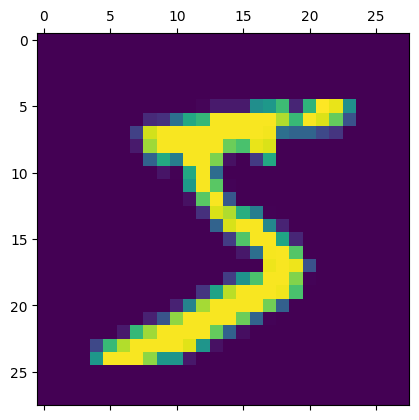

In [23]:
plt.matshow(X_train[0])
print(y_train[0])

0


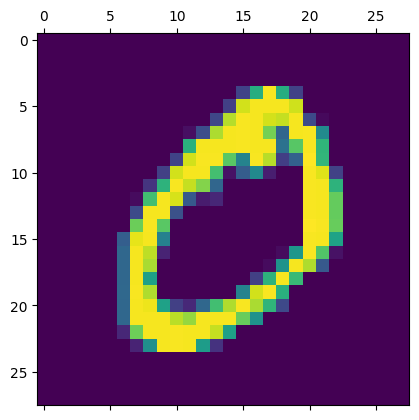

In [24]:
plt.matshow(X_train[1])
print(y_train[1])

In [25]:
X_train.shape

(60000, 28, 28)

8


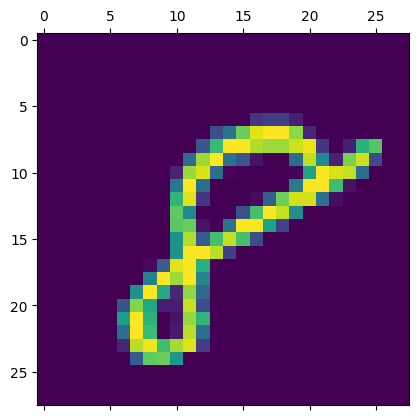

In [26]:
plt.matshow(X_train[59999])
print(y_train[59999])

## Plotting `X_test` matrices and checking correspoinding `y_test`

7


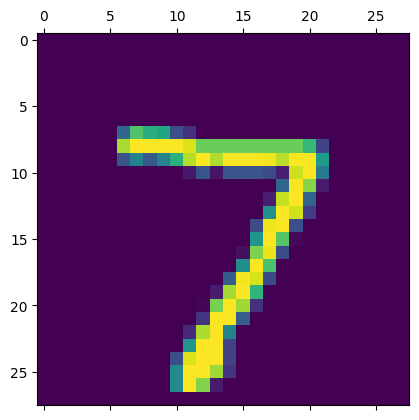

In [27]:
plt.matshow(X_test[0])
print(y_test[0])

2


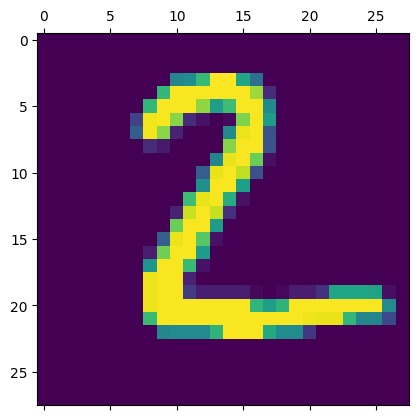

In [28]:
plt.matshow(X_test[1])
print(y_test[1])

In [29]:
X_test.shape

(10000, 28, 28)

6


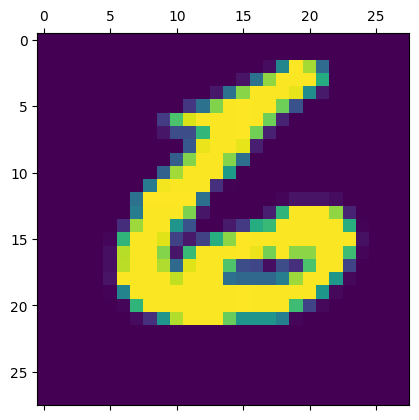

In [30]:
plt.matshow(X_test[9999])
print(y_test[9999])

## An quick overview of all the steps

![digits_nn.jpg](digits_nn.jpg)

## Flattening the arrays of `X_train` (i.e., `X_train[i]`) and `X_test` (i.e., `X_test[i]`)

### Flatening `X_train`

In [31]:
X_train.shape

(60000, 28, 28)

#### Converting `X_train[i]` into 1-d arrays
- That means inside `X_train`, we have `60000` 2-d arrays of shape `(28,28)`.
- And we have to convert all of the 2-d arrays into 1-d arrays. So, we need `60000` 1-d arrays of shape `(28*28,) = (784,)` and shape of `X_train` will be `(60000,784)`

In [32]:
X_train_flattened=X_train.reshape(len(X_train),28*28)

In [33]:
X_train_flattened.shape

(60000, 784)

In [34]:
X_train_flattened[0].shape

(784,)

In [35]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### Flatening `X_test`

In [36]:
X_test.shape

(10000, 28, 28)

#### Converting `X_test[i]` into 1-d arrays
- That means inside `X_test`, we have `10000` 2-d arrays of shape `(28,28)`.
- And we have to convert all of the 2-d arrays into 1-d arrays. So, we need `10000` 1-d arrays of shape `(28*28,) = (784,)` and shape of `X_test` will be `(10000,784)`

In [37]:
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [38]:
X_test_flattened.shape

(10000, 784)

In [39]:
X_test_flattened[0].shape

(784,)

In [40]:
X_test_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## Creating and Training a simple Neural Network

### Creating

- It has an **input layer** with `784` elements ( i.e., $x_1 ... x_{784}$ )
- It has an **output layer** with `10` elements. ( i.e., $0 ... 9$ )

- `Sequential` groups a linear stack of layers into a `tf.keras.Model`(our neural network).
- `Sequential` provides training and inference features on this model.

- Since it is a stack, it will accept every layer as one element.
- `keras.layers.Dense` means each neuron in input layer connected with every neuron in output layer.

In [41]:
# we are going to store the neural network into 'model' variable.
model = keras.Sequential(
    # keras.layers.Dense(output_shape, input_shape, activation_function)
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
)

### Training
- Keras provides a method, `compile()` to compile the model.
- `optimizer` allows us to train efficiently. when the backward propagation and training is going on `optimizer` allows us to reach to **global optimum** in a efficient way.
- In `loss` parameter we have to provide the **loss function name**. Like in **linear regression** we use **MSE**, here we will be using **`sparse_categorical_crossentropy`**.<br> `categorical` means our output class is **catagorical** because we have `0-9` catagories.<br>
- There are more [Tensorflow losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses) also.

In [42]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training of the model occurs right here
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.7694 - accuracy: 0.8393
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.1666 - accuracy: 0.8774
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.8026 - accuracy: 0.8818
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5837 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2898 - accuracy: 0.8869


- The accuracy is very low. It is because, we haven't scaled the the matrices. The acceptable accuracy is `0.9 - 1` and loss should be nearly equals to `~ 0`

## Evaluating accuracy on **Test dataset**

In [43]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.6147 - accuracy: 0.8913


[5.614747047424316, 0.8913000226020813]

## Scaling the dataset and reshaping the arrays

### Scaling

Since, the accuracy is very low, we have to scale the matrices. So we have to **divide the each element of the matrices by `255`** so that the **range `0 - 255` becomes `0 - 1`.**

In [44]:
X_train = X_train/255
X_test = X_test/255

In [45]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [46]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Reshaping

In [47]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

## Creating and Training the model after Scaling dataset

In [48]:
model = keras.Sequential(
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4766 - accuracy: 0.8748
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3048 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2670 - accuracy: 0.9265


Now we have got `92%` accuracy, which means our model is trained in such a way that **`92%` of the time it will make acuurate prediction.**

## Evaluating accuracy on **Test dataset** (after training the model on scaled dataset)

Previously, we have evaluated accuracy on training dataset. Before deploying a model into production level, we always evalute the accuracy on test dataset

In [49]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2663 - accuracy: 0.9245


[0.266252726316452, 0.9244999885559082]

And accuracy of test dataset is also coming around `92%`(before scaling `88%`) and loss is `0.2667`(before scaling `5.4260`). So, this model looks pretty good.

## Sample predictions

### prediction - 1
- prediction of first image in `X_test`

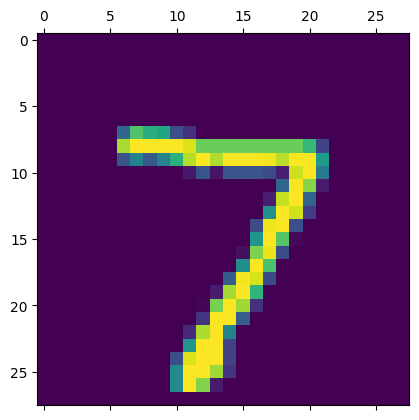

In [50]:
plt.matshow(X_test[0])

- These are prediction scores of the catagories `0-9` in the range `0-1`.

In [51]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.4492720e-02, 3.4571354e-07, 6.5508828e-02, 9.5857090e-01,
       3.1063880e-03, 9.8870106e-02, 1.4648800e-06, 9.9979150e-01,
       9.1312185e-02, 7.5260705e-01], dtype=float32)

- Returning the **index of maximum score** using `np.argmax(a)`

In [52]:
np.argmax(y_predicted[0])

7

### prediction - 2

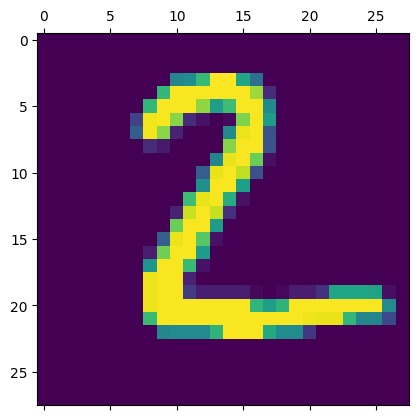

In [53]:
plt.matshow(X_test[1])

- prediction scores

In [54]:
y_predicted[1]

array([5.4584694e-01, 6.5430696e-03, 9.9883437e-01, 3.4720707e-01,
       5.1562715e-10, 8.2926202e-01, 9.1309083e-01, 8.6786736e-13,
       1.4079858e-01, 2.3602595e-09], dtype=float32)

- the index which have maximum prediction score. 

In [55]:
np.argmax(y_predicted[1])

2

## Analyzing the visual representation of our predictions using the **Confusion Matrix**

In [56]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [57]:
y_predicted[:5]

array([[2.4492720e-02, 3.4571354e-07, 6.5508828e-02, 9.5857090e-01,
        3.1063880e-03, 9.8870106e-02, 1.4648800e-06, 9.9979150e-01,
        9.1312185e-02, 7.5260705e-01],
       [5.4584694e-01, 6.5430696e-03, 9.9883437e-01, 3.4720707e-01,
        5.1562715e-10, 8.2926202e-01, 9.1309083e-01, 8.6786736e-13,
        1.4079858e-01, 2.3602595e-09],
       [3.9572589e-04, 9.9494618e-01, 6.6048342e-01, 3.1512961e-01,
        2.7555924e-02, 1.0179394e-01, 1.7140445e-01, 1.5352832e-01,
        3.5393107e-01, 4.8749108e-02],
       [9.9959278e-01, 1.4553380e-08, 6.4022034e-02, 5.8232103e-03,
        4.9388491e-05, 7.1120746e-02, 1.5189418e-01, 1.7149746e-02,
        2.7237182e-02, 3.2184955e-02],
       [4.6875853e-02, 3.8241436e-05, 1.7969690e-01, 3.2974961e-03,
        9.8967719e-01, 9.1675734e-03, 1.5189336e-01, 1.8139400e-01,
        3.1586212e-01, 8.0779999e-01]], dtype=float32)

- `y_test[i]` are integer values but `y_predicted[i]` is a matrix of scores of `0-9` catagories, it isn't predicting a catagory.
- So, we will store **predicted catagories/labels** into `y_predicted_labels`.

In [58]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [59]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

- Now we can see our **first 5 predictions are matching with first 5 truth data.**

### Building **Confusion Matrix**
- `tf.math.confusion_matrix(truth_data, predicted_data)`

In [60]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    3,    7,    3,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   7,   11,  920,   17,    8,    4,   13,   11,   36,    5],
       [   3,    0,   17,  925,    1,   20,    3,   10,   20,   11],
       [   2,    2,    3,    1,  912,    0,   11,    4,    7,   40],
       [  12,    3,    2,   37,   12,  760,   18,    9,   31,    8],
       [  13,    3,    5,    1,    7,    9,  917,    2,    1,    0],
       [   2,    5,   22,    4,    7,    0,    0,  949,    2,   37],
       [   9,   13,    6,   18,    9,   22,   10,   13,  856,   18],
       [  11,    7,    1,    9,   21,    5,    0,   23,    5,  927]])>

### Presenting the Confusion Matrix in a visually appealing way

Text(95.72222222222221, 0.5, 'Truth')

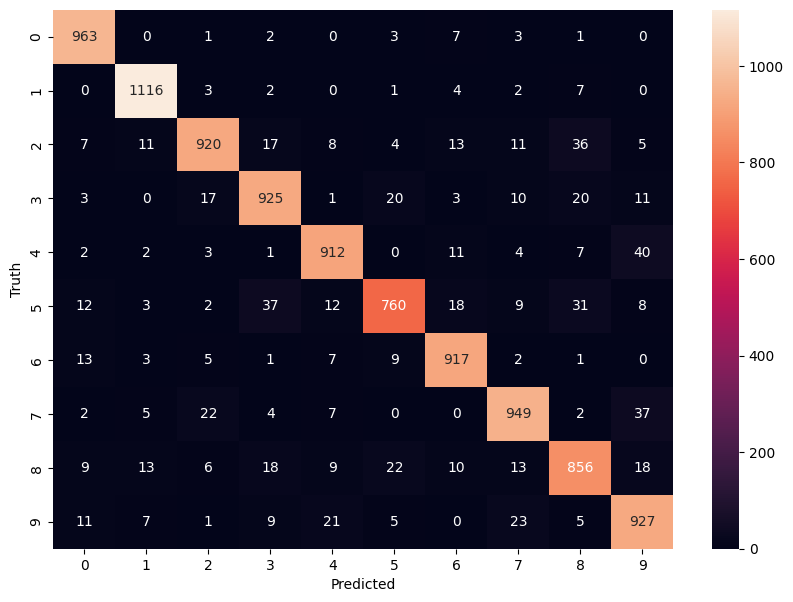

In [61]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Salient Findings
- 963 times the label was 0 and our model predicted it as 0. So, the prediction of 0 was correct 963 times.
![cm_963.png](cm_963.png)

- 1109 times it was 1 and our model is also predicted it as 1.
![cm_1109.png](cm_1109.png)

- 9 times it(Truth) was 2 but our model predicted as 1.
![cm_9.png](cm_9.png)

- So see anything which aren't in the diagonal, all these numbers are errors.
![cm_diag.png](cm_diag.png)
- But we have some errors. Like 46 times the number was 2 but our model said it is 8.
![cm_46.png](cm_46.png)

## Adding a hidden layer to achieve more accuracy
- If you add hidden layer then it generally improves the accuracy of the model.
- You will realize that when you have hidden layer our neural network will take more time to train. Beacuse, now it has to do more computations.
- You can add more hidden layers.

In [62]:
model = keras.Sequential([
     # There is no specific number of neurons to add into hidden layer. It is short of trial and error. There are some guidlelines but there is no thumb rule.
    # I am going initialize with some value which is less than input_shape. So, i will start with 100.
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    # my last layer doesen't need input_shape. Because, whatever the first layer connected it knows how to figure-out input_shape from that.
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2702 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1210 - accuracy: 0.9651
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0833 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0627 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0483 - accuracy: 0.9852


### Evaluting the performance on test set

In [63]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0797 - accuracy: 0.9757


[0.07973113656044006, 0.9757000207901001]

- When we have no hidden layer then the accuracy was **92%** but **now accuracy is 97%**

### Visualizing Confusion matrix

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

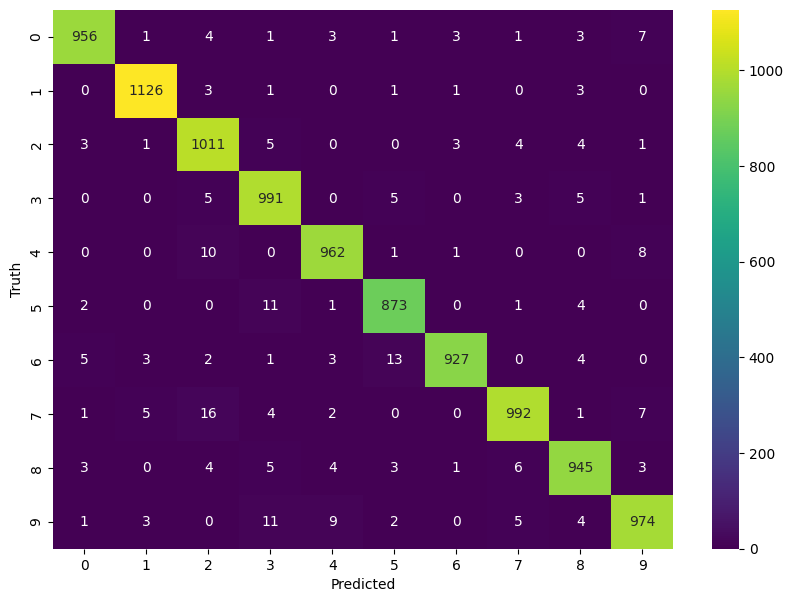

In [64]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Truth')

- Now, the errors in non-diagonal boxes decreased and number of correct predictions increased in diagonal boxes.
- In perfect state we have 0's in all non-diagonal boxes and big numbers are in diagonal boxes.

## Adding Flatten layer to eliminate the need for `np.reshape()` on the input dataset.
- It isn't recommended to use flatten array.
- If don't want to do this, then `keras` comes with a special layer called `Flatten`

In [65]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2694 - accuracy: 0.9230
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1226 - accuracy: 0.9642
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0861 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0662 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0520 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0426 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0342 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0273 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0235 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

### Evaluting the performance on test set

In [66]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0819 - accuracy: 0.9776


[0.08186344057321548, 0.9775999784469604]

### Visualizing Confusion matrix

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

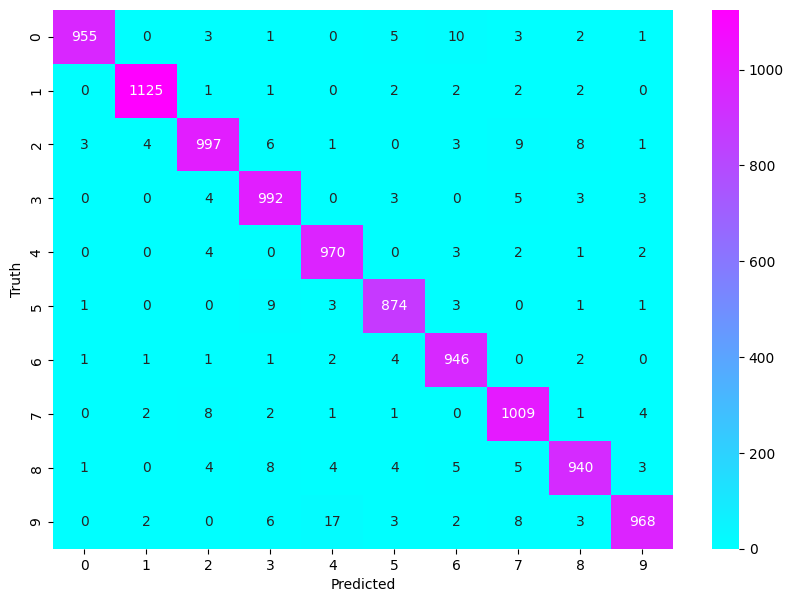

In [67]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='cool')
plt.xlabel('Predicted')
plt.ylabel('Truth')

- **Numbers of errors in non-diagonal boxes are decreased** and **number of correct predtions in diagonal boxes are increased** compared to the previous plot.

- We can compare that easily with the help of following image.<br>

![improved_merged1.png](improved_merged1.png)

- A quick snapshot of the all improvements.<br>

![cm_all_merged_png.png](cm_all_merged_png.png)

<br><br><br><br><br>

![wr_sign.png](wr_sign.png)